In [48]:
%matplotlib inline

In [49]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import statistics

In [50]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [51]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [52]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [53]:
### Inspect data for blank cells/nulls in city_data

In [54]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [55]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [56]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [57]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [58]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [59]:
# Get the number of data points from the Subrban cities.
sum(city_data_df["type"]=="Suburban")

36

In [60]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [61]:
### Inspect data for ride_data

In [62]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [63]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [64]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [65]:
#### We notice that both dataframes have "city" as common column so we will merge upon that

In [66]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [67]:
### We're being asked to create a bubble chart foraverage fare versus the total number of rides with bubble size based on 
# the average number of drivers for each city type: urban, suburban, and rural.

In [68]:
### Create Data Frames for each city type

In [69]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
# urban_cities_df.head()

In [70]:
# Create the Suburban DataFrames
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
#suburban_cities_df.head()

In [71]:
# Create Rural city DataFrames.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
#rural_cities_df.head()

In [72]:
### Create Count for each city Type

In [73]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [74]:
# Get the number of rides for Suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

In [75]:
# Get the number of rides for Rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [76]:
#### Get the Average Fare for Each City Type

In [77]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [78]:
# Get average fare for each city in the Suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

In [79]:
# Get average fare for each city in the Rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [80]:
### Get Driver Count for each city Type

In [81]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [82]:
# Get the average number of drivers for each Suburban city.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

In [83]:
# Get the average number of drivers for each Rural city.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [84]:
### Now we will construct scatter plots for each city type

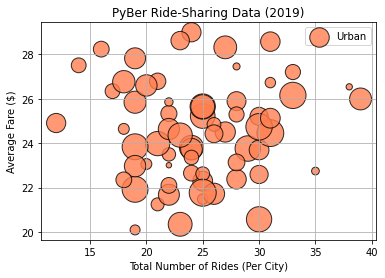

In [85]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)
# Add the legend.
plt.legend()

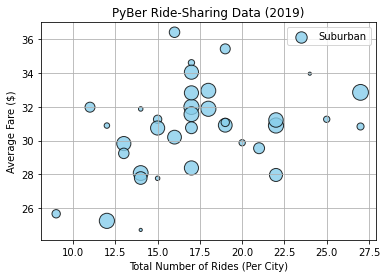

In [86]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

#plt.title("PyBer Ride-Sharing Data (2019)", weight ='bold', fontsize= 15) if we wanna change there size

plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City)")

#### Set Size of plot chart
#plt.rcParams['figure.figsize'] = [11, 11]

#plt.rcParams['font.size'] = 11.0

plt.grid(True)
# Add the legend.
plt.legend()

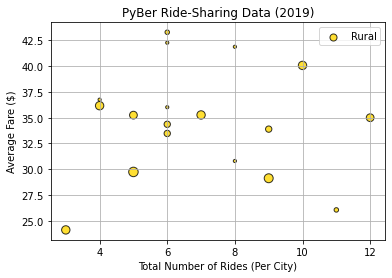

In [87]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

plt.show()

In [88]:
### Combining scatter plots/Bubble Charts

In [89]:
## To create a bubble chart that showcases all the different city types in one chart, 
## we'll combine our three scatter plot code blocks in one Jupyter Notebook cell.

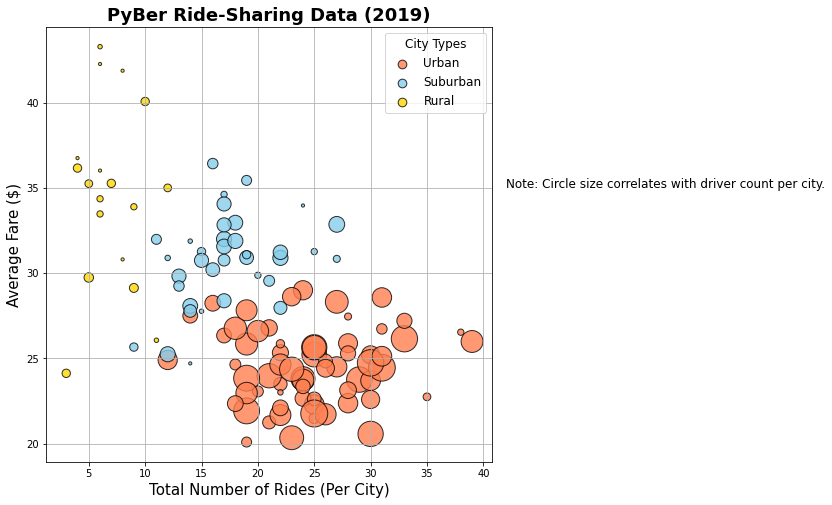

In [97]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=18, weight = "bold")
plt.ylabel("Average Fare ($)", fontsize=15)
plt.xlabel("Total Number of Rides (Per City)", fontsize=15)
plt.grid(True)

# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Set a note for viewer
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

#Setting Chart Size
plt.rcParams['figure.figsize'] = [8,8]


# Show the plot
plt.show()